In [106]:
path = '/content/drive/MyDrive/Dataset/Churn_Modelling.csv'

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
df=pd.read_csv(path)

In [109]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [110]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [111]:
x = df.iloc[:,3:13]
y = df['Exited']

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [113]:
geo = pd.get_dummies(x['Geography'],drop_first=True)
geo

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [114]:
gen = pd.get_dummies(x['Gender'],drop_first=True)
gen

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [115]:
X=dt.iloc[:,1:11]
y=dt['Exited']

In [116]:
X = pd.concat([x,geo,gen],axis = 1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [117]:
X.drop(['Gender','Geography'],axis = 1,inplace = True)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [119]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
	keras.layers.Dense(32, input_shape=(11,), activation='relu'),
	keras.layers.Dense(16, activation='relu'),
	keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer='adam', 
	          loss='binary_crossentropy',
	          metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 599.2598 - accuracy: 0.6578
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 40.2629 - accuracy: 0.6826
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 46.2932 - accuracy: 0.6833
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 40.9012 - accuracy: 0.6741
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 39.0141 - accuracy: 0.6801
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 50.9801 - accuracy: 0.6816
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 50.3905 - accuracy: 0.6862
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 46.1225 - accuracy: 0.6852
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 35.9596 - accuracy: 0.6793
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 39.9292 - accur

In [120]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 9.0451 - accuracy: 0.7950


[9.04508113861084, 0.7950000166893005]

In [121]:
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

In [122]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_classes)

cm

array([[1617,    0],
       [ 383,    0]])

Text(69.0, 0.5, 'Truth')

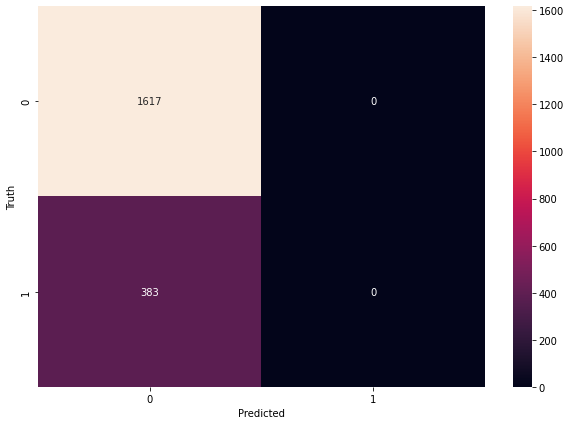

In [125]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [126]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      1617
           1       0.00      0.00      0.00       383

    accuracy                           0.81      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.81      0.72      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
